<a href="https://colab.research.google.com/github/crzysab/Data-Science-Real-Projects-in-Python/blob/main/Predict_Temperature_of_Different_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict Temperature of Different Cities using Time Series Analysis  Algorithms**

___

**Analyse Whether Global Warming
exists or not**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive

drive.mount('/content/drive')
global_temp = pd.read_csv("/content/drive/My Drive/dataset/GlobalTemperatures.csv")

Mounted at /content/drive


In [4]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Mendapatkan data tahun
global_temp['dt'][0].split('-')[0]

'1750'

In [6]:
def fetch_year(date):
  return date.split('-')[0]

In [7]:
#Menggunakan fungsi fetch_year ke dalam kolom dt dan membuat kolom baru

global_temp['years']=global_temp['dt'].apply(fetch_year)

In [8]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [9]:
#Mendapatkan Nilai Rata-Rata Pertahun

data = global_temp.groupby('years').agg({'LandAverageTemperature':'mean', 'LandAverageTemperatureUncertainty':'mean'}).reset_index()
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [10]:
data['uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,uncertainty_top,uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [11]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'uncertainty_top', 'uncertainty_bottom'],
      dtype='object')

In [ ]:
pip install plotly

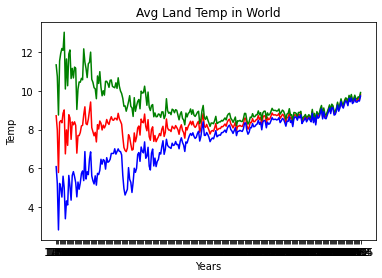

In [12]:
plt.plot(data['years'], data['LandAverageTemperature'], 'r-' )
plt.plot(data['years'], data['uncertainty_top'], 'g-' )
plt.plot(data['years'], data['uncertainty_bottom'], 'b-' )
plt.title('Avg Land Temp in World')
plt.xlabel('Years')
plt.ylabel('Temp')
plt.show()

In [13]:
#fig = px.line(data, x='years', y=['LandAverageTemperature', 'uncertainty_top', 'uncertainty_bottom'], title='Avg Land Temp in World')
fig = px.line(data, x='years', y='LandAverageTemperature', title='Avg Land Temp in World')
#fig = px.line(data, x='years', y='uncertainty_top', title='Avg Land Temp in World')
#fig = px.line(data, x='years', y='uncertainty_bottom', title='Avg Land Temp in World')
fig.show()

**Explore Average Temperature of Each
Season**

In [14]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [15]:
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
dtype: object

In [16]:
#Mengubah tipe data menjadi datetime
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [17]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [18]:
global_temp['month'] = global_temp['dt'].dt.month

In [19]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [20]:
#Membuat fungsi untuk mendapatkan kategori musim

def get_season(month):
  if month>=3 and month<=5 :
    return 'spring'
  elif month>=6 and month<=8 :
    return 'summer'
  elif month>= 9 and month<=11:
    return 'autumn'
  else:
    return 'winter'

In [21]:
global_temp['season'] = global_temp['month'].apply(get_season)

In [22]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [23]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [24]:
years = global_temp['years'].unique()

In [25]:
for year in years:
  current_df = global_temp[global_temp['years']==year]
  spring_temps.append(current_df[current_df['season']=='spring']['LandAverageTemperature'].mean())
  summer_temps.append(current_df[current_df['season']=='summer']['LandAverageTemperature'].mean())
  autumn_temps.append(current_df[current_df['season']=='autumn']['LandAverageTemperature'].mean())
  winter_temps.append(current_df[current_df['season']=='winter']['LandAverageTemperature'].mean())

In [26]:
season = pd.DataFrame()

In [27]:
season['year'] = years
season['spring_temps']=spring_temps
season['summer_temps']=summer_temps
season['autumn_temps']=autumn_temps
season['winter_temps']=winter_temps

In [28]:
season.head()

,year,spring_temps,summer_temps,autumn_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [30]:
#fig = px.line(season, x='year', y=['spring_temps', 'summer_temps', 'autumn_temps', 'winter_temps'])
fig = px.line(season, x='year', y='winter_temps')
fig.show()

**Perform Data Pre-Processing on your data**

In [34]:
drive.mount('/content/drive')
cities = pd.read_csv("/content/drive/My Drive/dataset/GlobalLandTemperaturesByCity.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [35]:
cities.shape

(8599212, 7)

In [40]:
#Data USA
usa = cities[cities['Country']=='United States']

In [41]:
usa.shape

(687289, 7)

In [44]:
#Filter untuk 2 kota
data = ['New York', 'Los Angeles', 'San Francisco']

In [43]:
data2 = usa[usa['City'].isin(data)]
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [46]:
#Filter untuk membuat dataframe yang kolom dt dan AverageTemperature
data2 = data2[['dt','AverageTemperature']]

In [47]:
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [56]:
data2.columns = ['Date','Temp']

In [57]:
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [60]:
#Mengubah tipe data dt menjadi datetime
data2['Date'] = pd.to_datetime(data2['Date'])

In [61]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [52]:
#Menghapus Missing Value
data2.dropna(inplace=True)

In [63]:
data2.isna().sum()

Date    0
Temp    0
dtype: int64

In [64]:
data2.shape

(7073, 2)

In [65]:
#Memperbaharui index data
data2.set_index('Date',inplace=True)

In [67]:
data2.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


**How to check Whether Data is
Stationery or not**

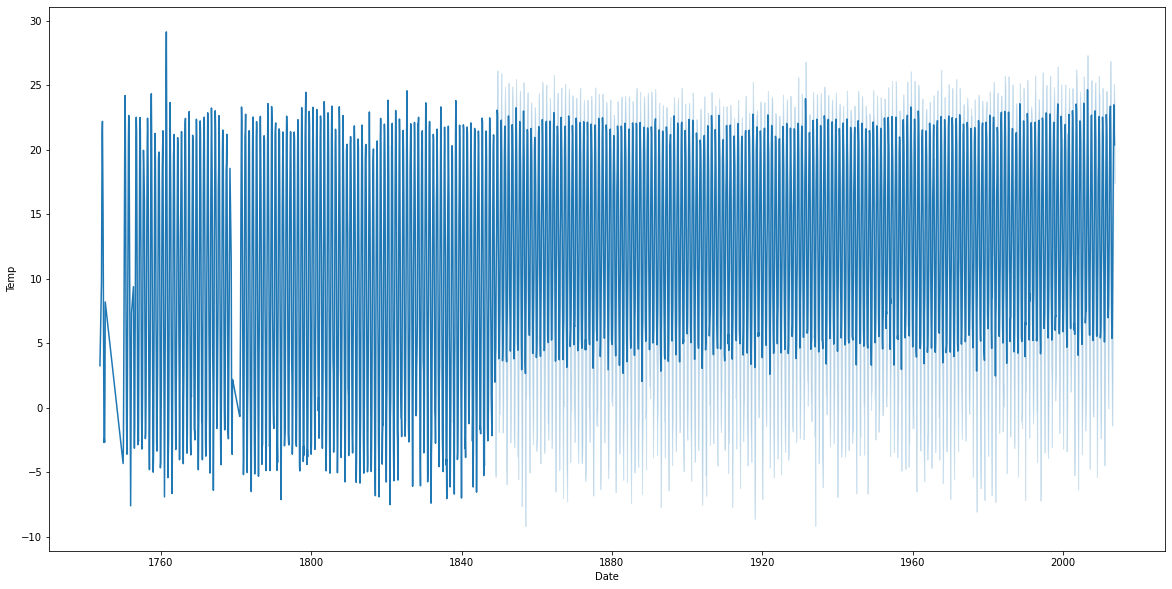

In [70]:
plt.figure(figsize=(20,10))

import seaborn as sns
sns.lineplot(x=data2.index, y=data2['Temp'])

In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
adfuller(data2['Temp'])

(-2.0063893036757956,
 0.28377865833332594,
 35,
 7037,
 {'1%': -3.431279613044704,
  '10%': -2.5669886726127307,
  '5%': -2.8619508146206374},
 28011.222669408726)

In [73]:
def adfuller_test(Temp):
  result = adfuller(Temp)
  labels = ['ADF Test stats','p-value','flags used','no of observation used']

  for value,label in zip(result,labels):
    print('{} : {}'.format(label,value))
  
  if result[1]<=0.05:
    print('Strong Evidence Against the null hypo, hence we can reject the null hypo and data is stationery')
  else :
    print('Weak Evidence Against the null hypo, hence we have failed to reject the null hypo and data is not stationery')

In [74]:
adfuller_test(data2['Temp'])

ADF Test stats : -2.0063893036757956
p-value : 0.28377865833332594
flags used : 35
no of observation used : 7037
Weak Evidence Against the null hypo, hence we have failed to reject the null hypo and data is not stationery


**How to make your Data Stationary ?**

In [75]:
#Membuat backup DataFrame
df = data2.copy()

In [76]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [77]:
df['first_diff_temp'] = df['Temp'] - df['Temp'].shift(12)

In [78]:
df.head(20)

,Temp,first_diff_temp
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
1849-06-01,21.173,NaN
1849-07-01,26.159,NaN
1849-08-01,26.099,NaN
1849-09-01,21.848,NaN


In [79]:
adfuller_test(df['first_diff_temp'].dropna())

ADF Test stats : -21.23965040491091
p-value : 0.0
flags used : 35
no of observation used : 7025
Strong Evidence Against the null hypo, hence we can reject the null hypo and data is stationery


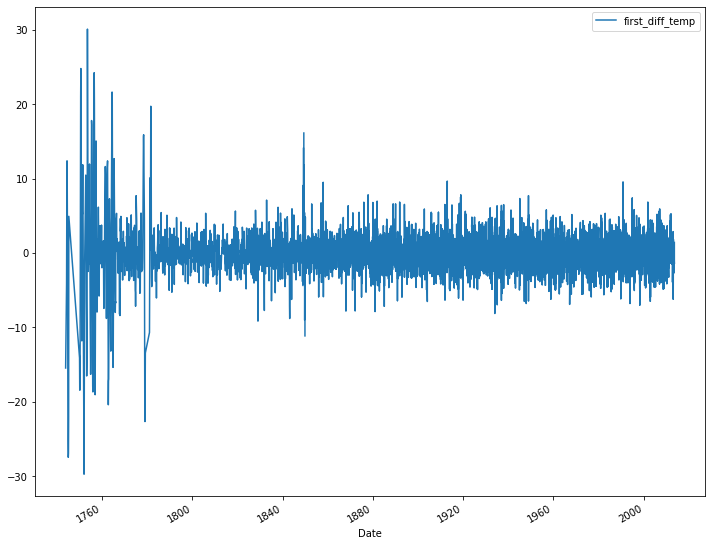

In [81]:
df[['first_diff_temp']].plot(figsize=(12,10))